In [9]:
import matplotlib.pyplot as plt
from flow_utils import *

In [10]:
WORLDX, WORLDY = 100, 100
step = 5

vortices = [
    [np.array([20, 20]), 10, -100],
    [np.array([80,80]), 10, 100],
    [np.array([20,80]), 10, -100],
    [np.array([60,30]), 10, -100],
]  

In [11]:
XX, YY = np.meshgrid(np.arange(0, WORLDX+step, step), np.arange(0, WORLDY+step, step))
XY = np.dstack([XX, YY]).reshape(-1, 2)
XY.shape

(441, 2)

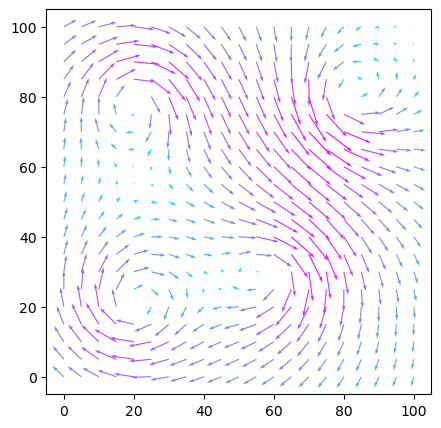

In [12]:
fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

V = determine_current_field(XY, vortices)
Vx = V[:, 0]
Vy = V[:, 1]
M = np.hypot(Vx, Vy)
ax.quiver(XX, YY, Vx, Vy, M, cmap='cool', scale=20)
plt.show()

In [13]:
start = np.array([0, 0])
goal = np.array([WORLDX, WORLDY])

In [14]:
grid_shape = (100, 100)
weights = np.zeros(grid_shape)
weights.shape
forces = np.zeros((grid_shape[0], grid_shape[1], 2))

In [15]:
def calculate_distance_to_nearest_vortex(point, vortices):
    min_distance = np.inf
    for vortex in vortices:
        vortex_center, _, _ = vortex
        vortex_point_distance = np.linalg.norm(vortex_center - point)
        min_distance = min(vortex_point_distance, min_distance)
    return min_distance

c:\Git\estudos\robotica\tpfinal\flow_utils.py:25: RuntimeWarning: invalid value encountered in divide
  * ((point[:, 1] - vortex_center[1]) / (2 * np.pi * distance**2))
c:\Git\estudos\robotica\tpfinal\flow_utils.py:30: RuntimeWarning: invalid value encountered in divide
  * ((point[:, 0] - vortex_center[0]) / (2 * np.pi * distance**2))


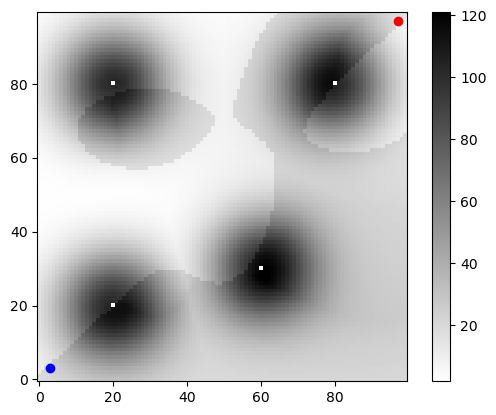

In [17]:
weights, forces = calculate_weights(grid_shape, vortices, goal)

plt.imshow(weights, cmap="gray_r", interpolation="nearest", origin="lower")
plt.plot(*[97, 97], 'o', color='r')
plt.plot(*[3, 3], 'o', color='b')
plt.colorbar()
plt.show()

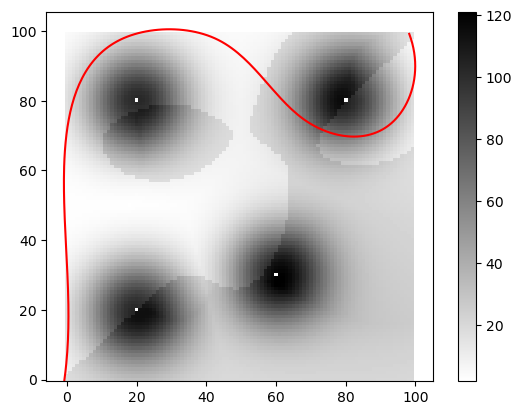

In [19]:
katt = 0.75

prev = djikstra(grid_shape, weights, forces, katt)
path = create_path(grid_shape, prev, vortices, XY)

# Plot the path
x_coords, y_coords = zip(*path)
plt.imshow(weights, cmap='gray_r', interpolation='nearest', origin='lower')
plt.plot(x_coords[::5], y_coords[::5], color='red')
plt.colorbar()
plt.show()

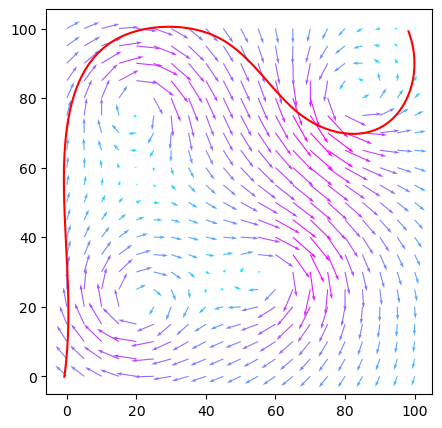

In [20]:
fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

ax.quiver(XX, YY, Vx, Vy, M, cmap='cool', scale=20)
plt.plot(x_coords[::5], y_coords[::5], color='red')
plt.show()